# This notebook is to cluster normalized subtracted density can cluster RBPs based on their known function
## Load Precomputed Density

In [1]:
import deepdish as dd
import os
import sys
sys.path.append('/home/hsher/Metadensity/scripts')
from dataloader import *

# let's just load 1 example 
base_dir = '/home/hsher/densities'


In [2]:
# find proteins with density precomputed
uids = [f.split('_')[0] for f in os.listdir(base_dir) if 'densityarr' in f]

with_data = master_df.set_index('uid').loc[uids]

In [3]:
hepg2_uids = with_data.loc[with_data['Cell line'] == 'HepG2']
hepg2_uids.drop_duplicates(subset = ['RBP'], inplace = True)
k562_uids = with_data.loc[with_data['Cell line'] == 'K562']
k562_uids.drop_duplicates(subset = ['RBP'], inplace = True)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Generic RNA metadensity
The features of interest are `['first_exon', 'exon', 'intron', 'last_exon']`

# Load density probability distribution

In [1]:
from annoloader import rbp_class_color, subset


ModuleNotFoundError: No module named 'annoloader'

In [17]:
def get_map(df, colors, names, rbp_class_color = rbp_class_color, vmax = 0.1, vmin = 0, colorbar_lbl = 'Normalized Subtracted Metadensity'):
    df = df.loc[df.sum(axis = 1)>0] # only those with significant data
    
    cmap = sns.cubehelix_palette(8, start=7, rot=0, dark=0, light=.95, as_cmap=True)
    g = sns.clustermap(df.T, 
                   metric ="correlation", method = "complete",
                   col_cluster = True,  col_colors = rbp_class_color,
                   row_cluster = False, row_colors = colors,
                   xticklabels=1,z_score = 1,
                   figsize=(19, 10), cmap = cmap, cbar_pos=(0.95, .2, .03, .4),
                       colors_ratio = 0.015, vmax = vmax, vmin = vmin,
                      cbar_kws = {'label': colorbar_lbl})
    g.ax_heatmap.set_xlabel('RBPs')
    g.ax_heatmap.set_ylabel('metagene position')

    for label in names:
        g.ax_col_dendrogram.bar(0, 0, color=color_dict[label],
                            label=label, linewidth=0)
    g.ax_col_dendrogram.legend(loc="best", bbox_to_anchor=(1.1, 1.5), ncol=1)
    
    

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/seaborn-0.11.0-py3.7.egg/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


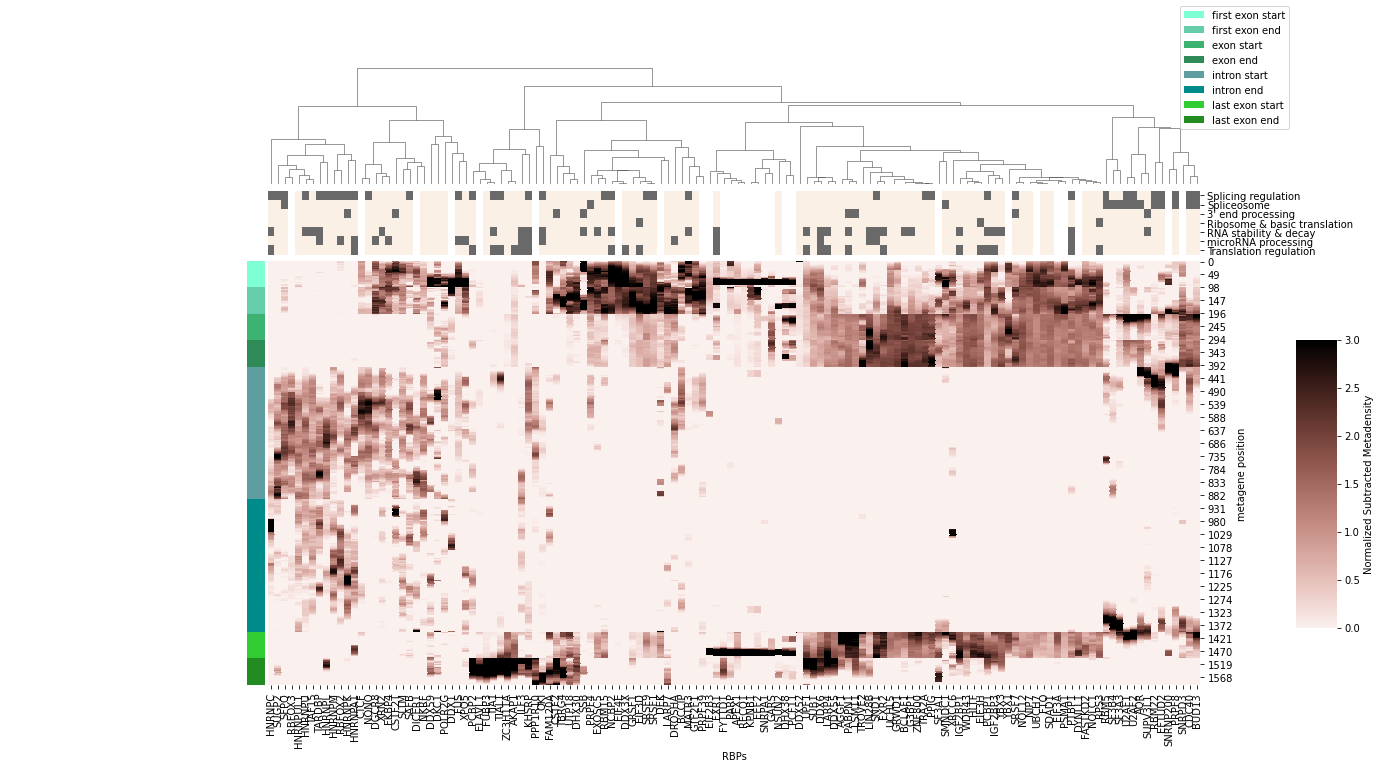

In [20]:
# HepG2 RNA
df, flen = into_one_df(hepg2_uids.index.tolist(), rna)
rna_color, names = get_feat_color(rna, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df, rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice
/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/seaborn-0.11.0-py3.7.egg/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


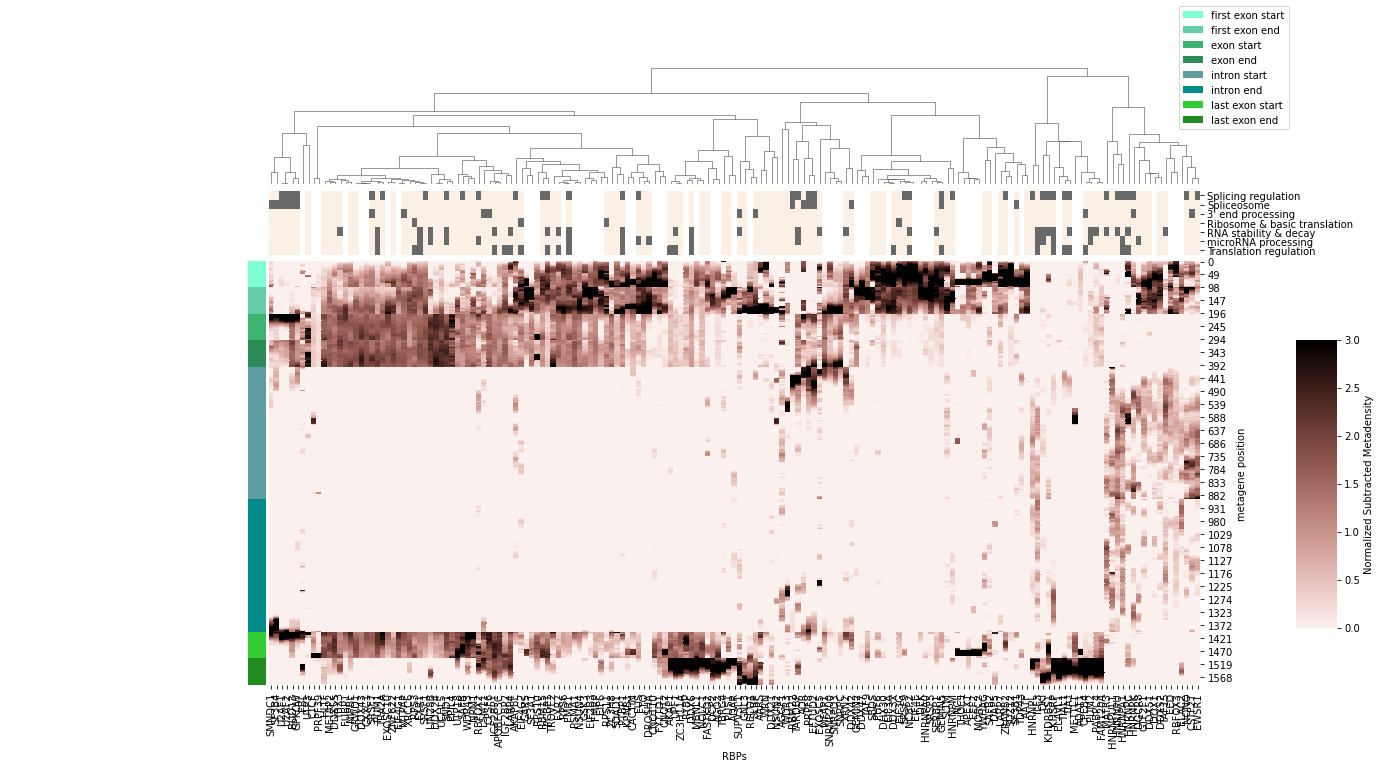

In [22]:
# HepG2 RNA
df, flen = into_one_df(k562_uids.index.tolist(), rna)
rna_color, names = get_feat_color(rna, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df, rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice
/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/seaborn-0.11.0-py3.7.egg/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


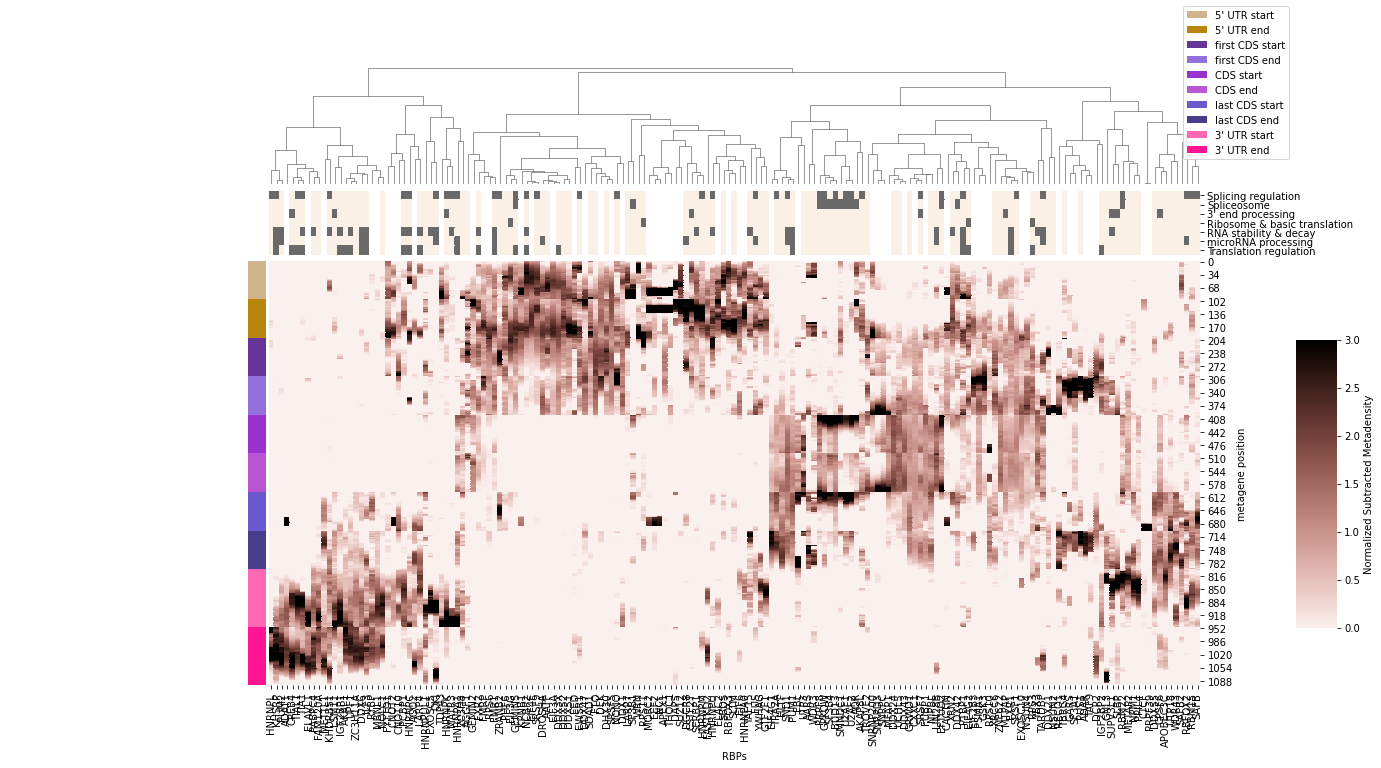

In [23]:
# HepG2 RNA
df, flen = into_one_df(k562_uids.index.tolist(),protein_coding)
rna_color, names = get_feat_color(protein_coding, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df, rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/seaborn-0.11.0-py3.7.egg/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


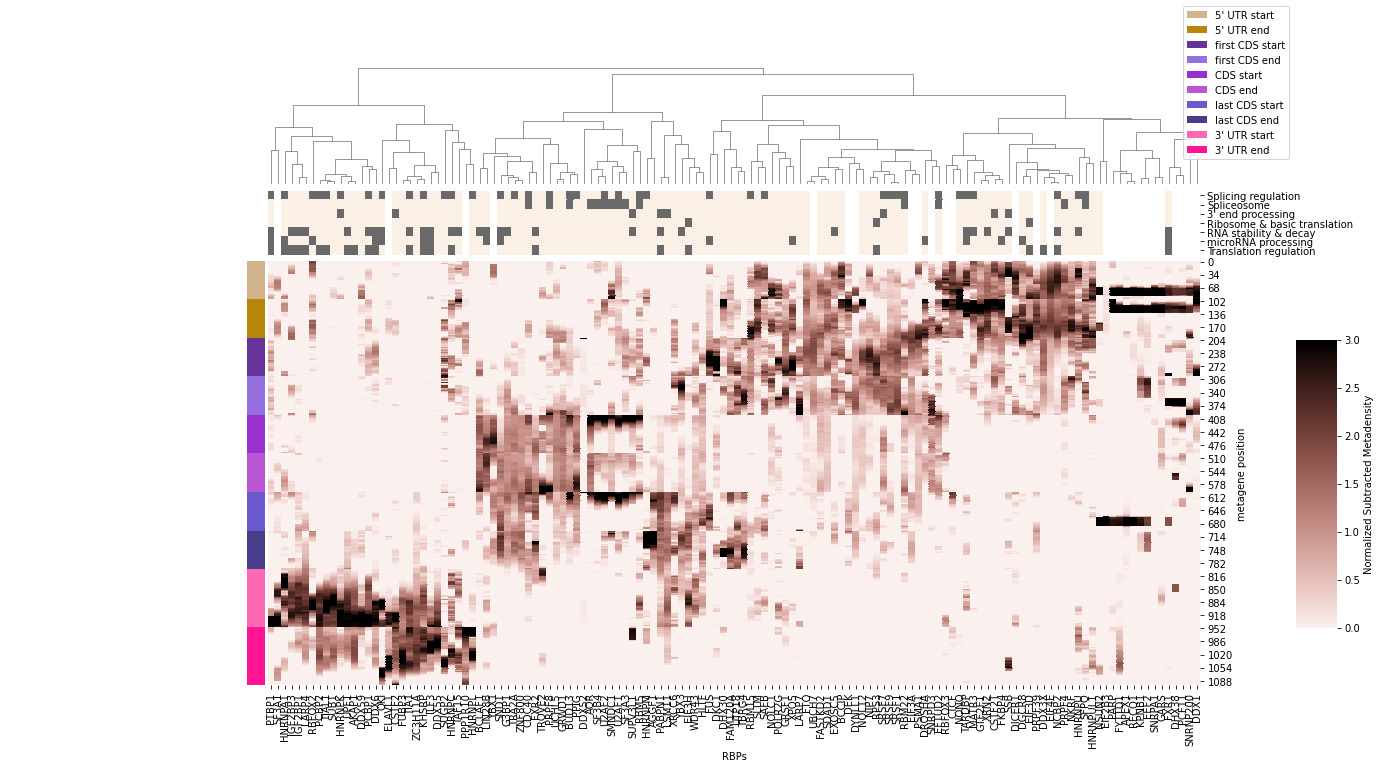

In [24]:
# HepG2 RNA
df, flen = into_one_df(hepg2_uids.index.tolist(),protein_coding)
rna_color, names = get_feat_color(protein_coding, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df, rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice


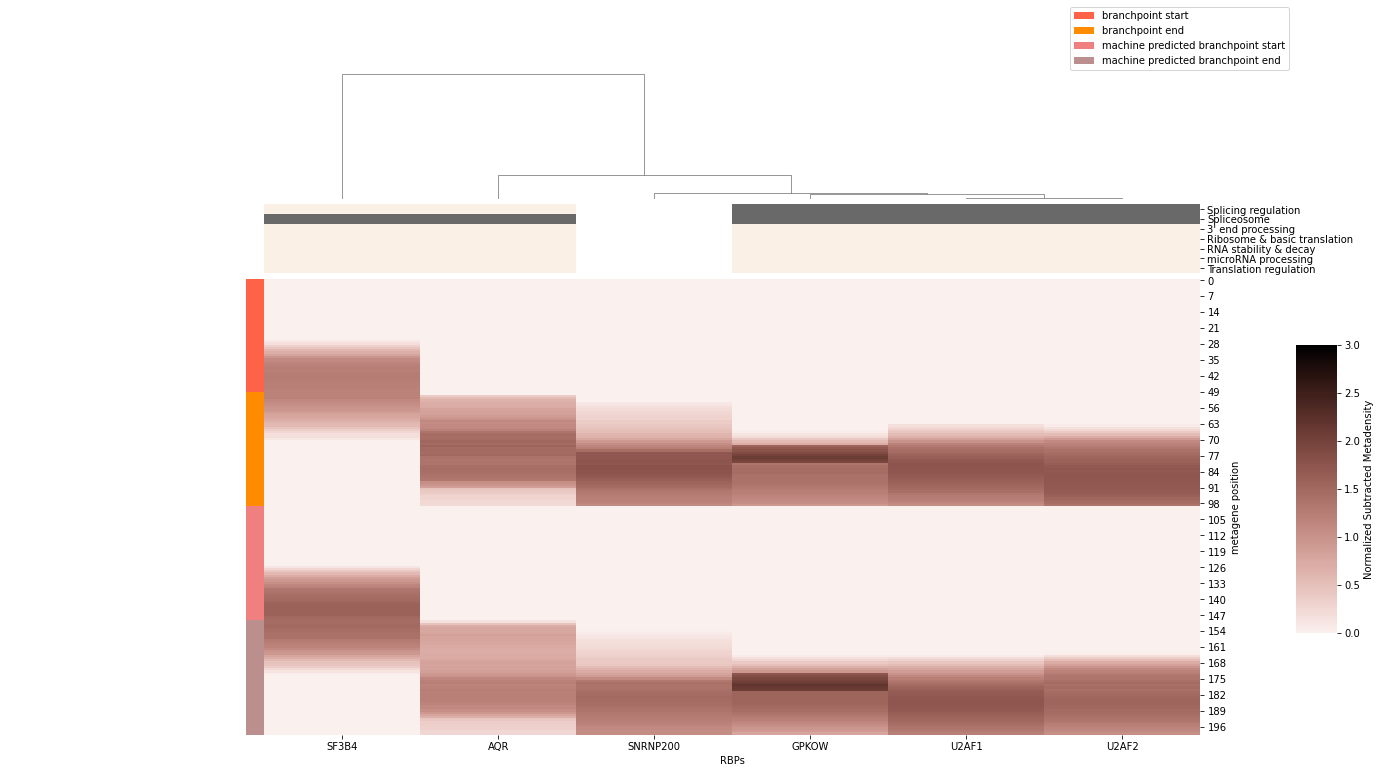

In [44]:
# HepG2 RNA
from metadensity.plotd import *
df, flen = into_one_df(k562_uids.index.tolist(),branchpoints)
rna_color, names = get_feat_color(branchpoints, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df.loc[df.iloc[:,:70].ge(0.0002).any(axis = 1)], rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice


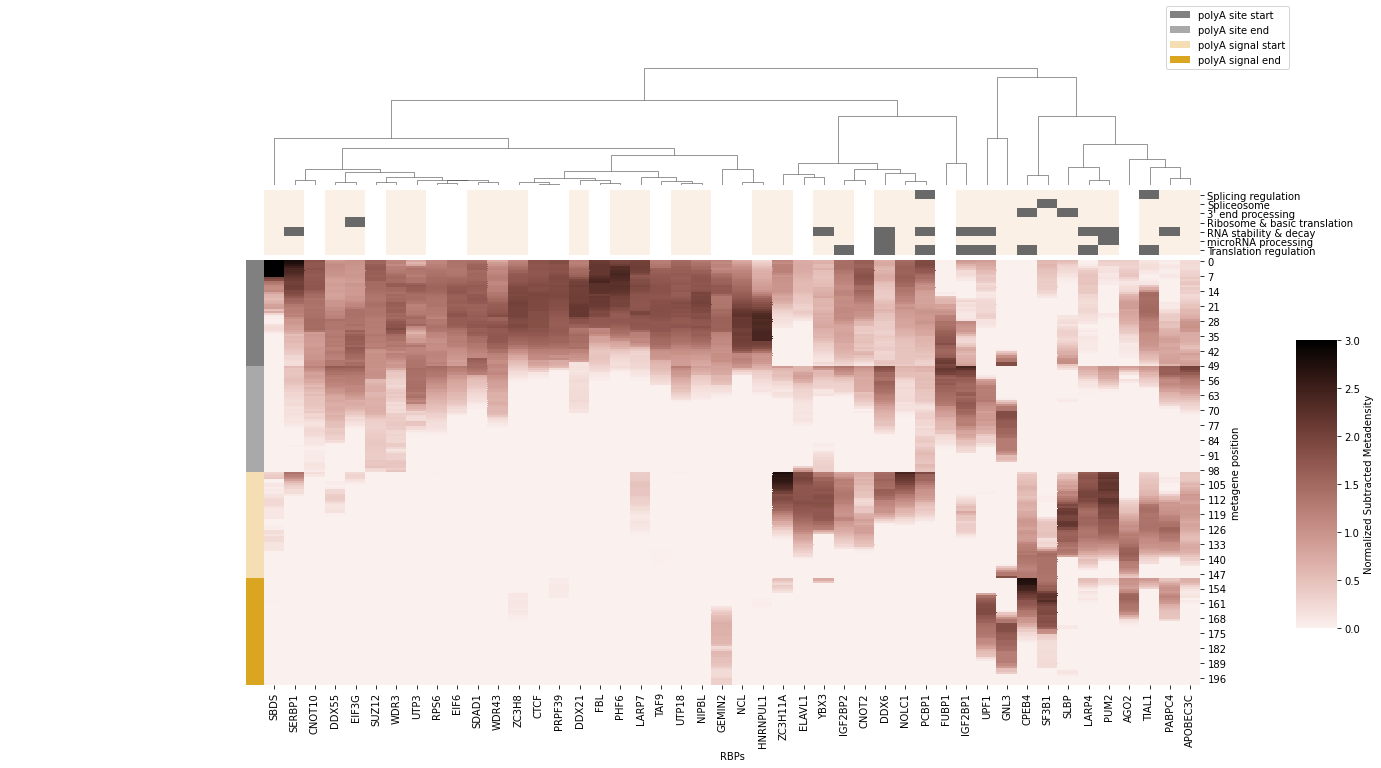

In [56]:
# HepG2 RNA
from metadensity.plotd import *
df, flen = into_one_df(k562_uids.index.tolist(),polyAs)
rna_color, names = get_feat_color(polyAs, flen)
df.index = master_df.set_index('uid').loc[df.index, 'RBP']
get_map(df.loc[(df.iloc[:,:35:65].ge(0.0002).any(axis = 1))|df.iloc[:,:135:165].ge(0.0002).any(axis = 1)], rna_color, names, rbp_class_color = rbp_class_color[subset], vmax = 3)

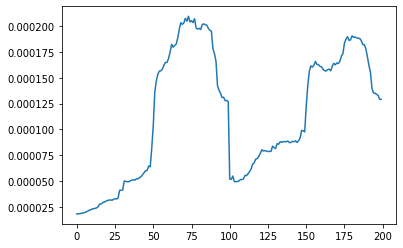

In [38]:
df.loc['AQR']